In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
SSE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#42 SSE1.csv.csv")
SSE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#43 SSE2.csv.csv")
SSE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#44 SSE3.csv.csv")
SSE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#45 SSE4.csv.csv")
SSE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test46 SSE5.csv.csv")

In [3]:
#Loading the corresponding force data
force_SSE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#42 SSE1.log" , delimiter = "\t")
force_SSE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#43 SSE2.log" , delimiter = "\t")
force_SSE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#44 SSE3.log" , delimiter = "\t")
force_SSE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#45 SSE4.log" , delimiter = "\t")
force_SSE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#46 SSE5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_SSE1 = force_SSE1["Time"]
x_force_SSE2 = force_SSE2["Time"]
x_force_SSE3 = force_SSE3["Time"]
x_force_SSE4 = force_SSE4["Time"]
x_force_SSE5 = force_SSE5["Time"]

#force
Load_SSE1 = force_SSE1["Load"]
Load_SSE2 = force_SSE2["Load"]
Load_SSE3 = force_SSE3["Load"]
Load_SSE4 = force_SSE4["Load"]
Load_SSE5 = force_SSE5["Load"]

#plt.plot(x_force_SSE1,Load_SSE1,color = 'green', label = 'force data SSE1 test #42' )
#plt.plot(x_force_SSE2,Load_SSE2,color = 'blue', label = 'force data SSE2 test #43' )
# plt.plot(x_force_SSE3,Load_SSE3,color = 'yellow', label = 'force data SSE3 test 44' )
# plt.plot(x_force_SSE4,Load_SSE4,color = 'red', label = 'force data SSE4 test #45' )
# plt.plot(x_force_SSE5,Load_SSE5,color = 'brown', label = 'force data SSE5 test #46' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SSE1


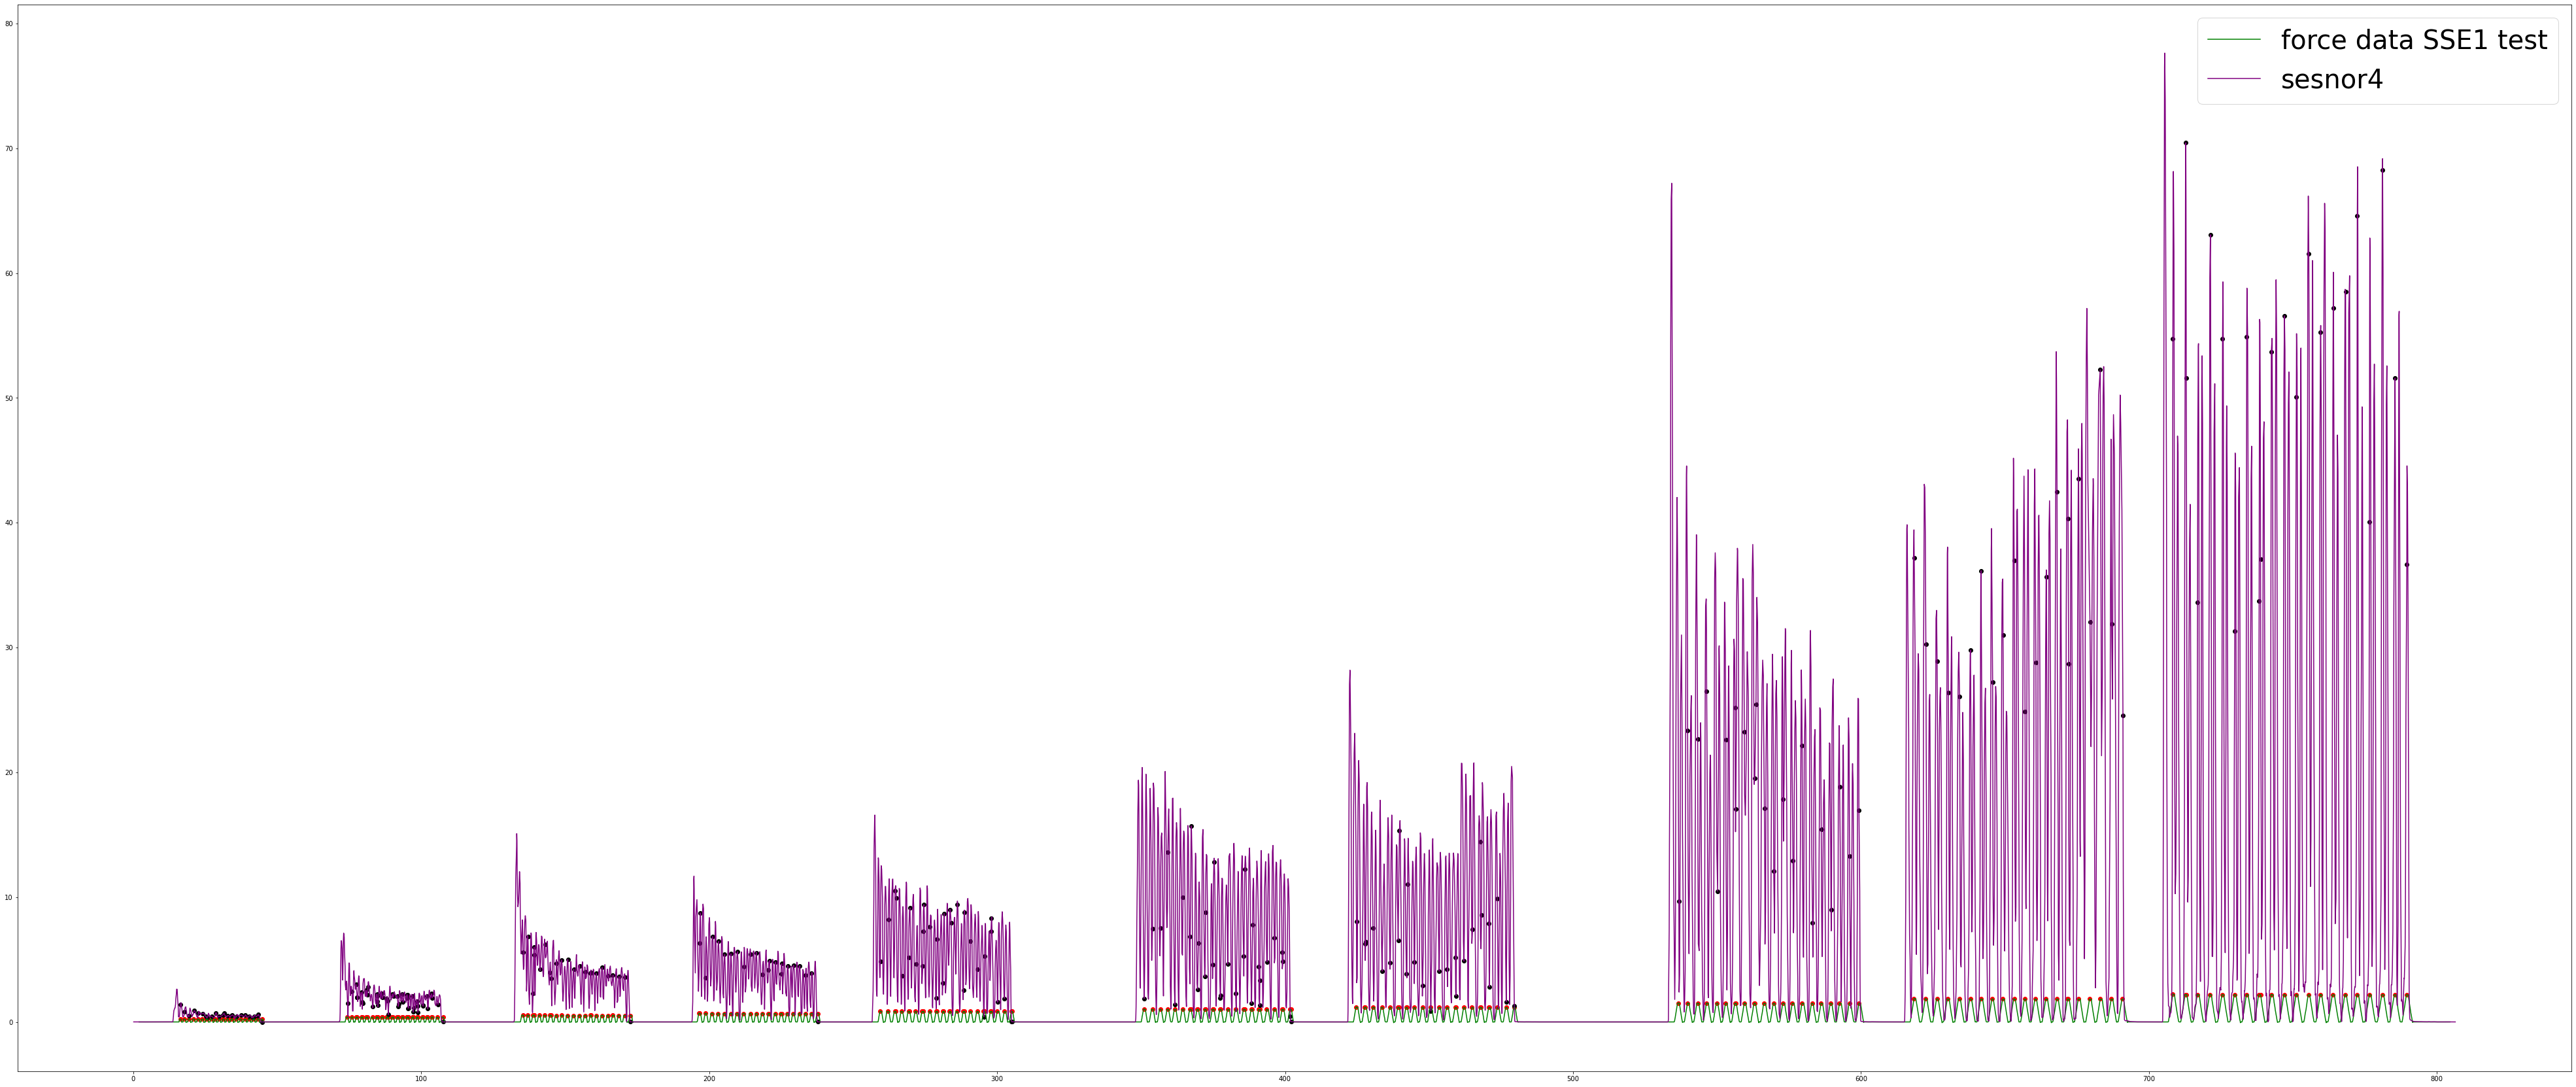

In [11]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSE1

plt.figure(figsize=(70, 30))

# plt.plot(SSE1["Unnamed: 0"],SSE1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSE1["Unnamed: 0"],SSE1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSE1["Unnamed: 0"],SSE1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSE1["Unnamed: 0"],SSE1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSE1 = x_force_SSE1 + 2
scaled_SSE1 = SSE1["Unnamed: 0"]

plt.plot(scaled_x_force_SSE1,Load_SSE1,color = 'green', label = 'force data SSE1 test' )
plt.plot(scaled_SSE1,SSE1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSE1")

#finding the peaks
pidx_Load_SSE1, _ = find_peaks(Load_SSE1,prominence= 0.1 )
peaks_Load_SSE1 = Load_SSE1[pidx_Load_SSE1]
peaks_Ltime_SSE1 = scaled_x_force_SSE1[pidx_Load_SSE1]

plt.scatter(peaks_Ltime_SSE1,peaks_Load_SSE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSE1time = []
peaks_Ltime_SSE1.reset_index(drop = True, inplace = True)
peaks_Load_SSE1.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SSE1)):
    idx_SSE1time.append(bisect.bisect_left(SSE1["Unnamed: 0"], peaks_Ltime_SSE1[i]))

plt.scatter(SSE1["Unnamed: 0"][idx_SSE1time],SSE1["s4_d"][idx_SSE1time],color = 'black')

In [12]:
#Storing the data in csv files - SSE1
Load_SSE1peaks =[]
for i in range(len(peaks_Load_SSE1)):
    Load_SSE1peaks.append(peaks_Load_SSE1[i])
    
content_SSE1 = {'R1':SSE1["s1_d"][idx_SSE1time],
              'R2':SSE1["s2_d"][idx_SSE1time],
              'R3':SSE1["s3_d"][idx_SSE1time],
              'R4':SSE1["s4_d"][idx_SSE1time], 
              'Load': Load_SSE1peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SSE1 = pd.DataFrame(content_SSE1, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SSE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSE1.csv',index = False, header = True)

Sensor 4 is more profound for SSE2


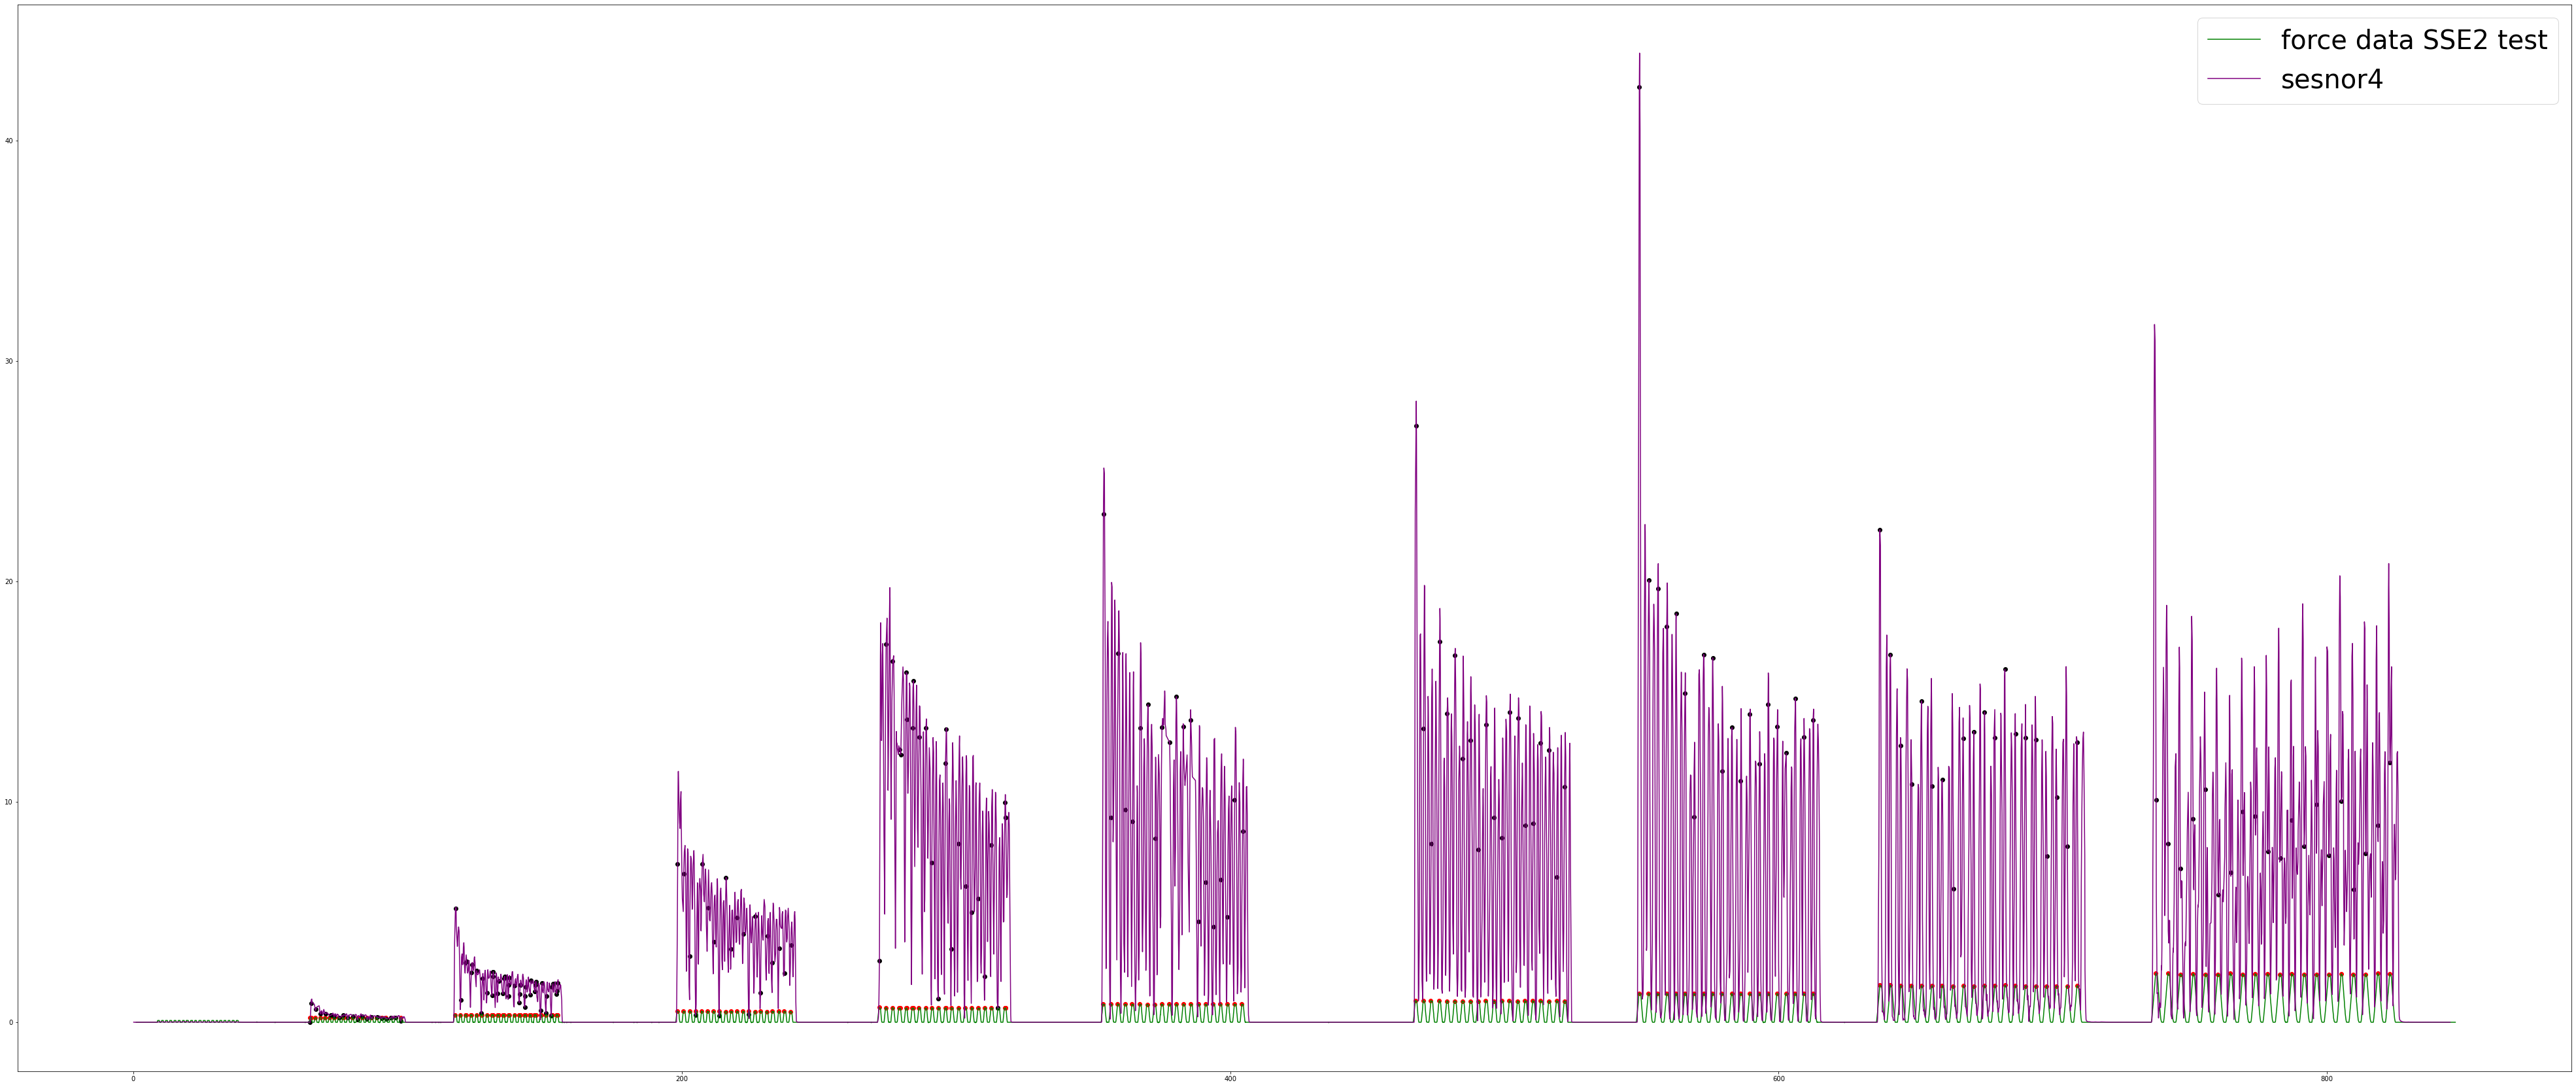

In [17]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSE2

plt.figure(figsize=(70, 30))

# plt.plot(SSE2["Unnamed: 0"],SSE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSE2["Unnamed: 0"],SSE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSE2["Unnamed: 0"],SSE2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSE2["Unnamed: 0"],SSE2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSE2 = x_force_SSE2 + 1
scaled_SSE2 = SSE2["Unnamed: 0"]

plt.plot(scaled_x_force_SSE2,Load_SSE2,color = 'green', label = 'force data SSE2 test' )
plt.plot(scaled_SSE2,SSE2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSE2")

#finding the peaks
pidx_Load_SSE2, _ = find_peaks(Load_SSE2,prominence= 0.1 )
peaks_Load_SSE2 = Load_SSE2[pidx_Load_SSE2]
peaks_Ltime_SSE2 = scaled_x_force_SSE2[pidx_Load_SSE2]

plt.scatter(peaks_Ltime_SSE2,peaks_Load_SSE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSE2time = []
peaks_Ltime_SSE2.reset_index(drop = True, inplace = True)
peaks_Load_SSE2.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SSE2)):
    idx_SSE2time.append(bisect.bisect_left(SSE2["Unnamed: 0"], peaks_Ltime_SSE2[i]))

plt.scatter(SSE2["Unnamed: 0"][idx_SSE2time],SSE2["s4_d"][idx_SSE2time],color = 'black')

In [19]:
#Storing the data in csv files - SSE2
Load_SSE2peaks =[]
for i in range(len(peaks_Load_SSE2)):
    Load_SSE2peaks.append(peaks_Load_SSE2[i])
    
content_SSE2 = {'R1':SSE2["s1_d"][idx_SSE2time],
              'R2':SSE2["s2_d"][idx_SSE2time],
              'R3':SSE2["s3_d"][idx_SSE2time],
              'R4':SSE2["s4_d"][idx_SSE2time], 
              'Load': Load_SSE2peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SSE2 = pd.DataFrame(content_SSE2, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SSE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSE2.csv',index = False, header = True)

Sensor 4 is more profound for SSE3


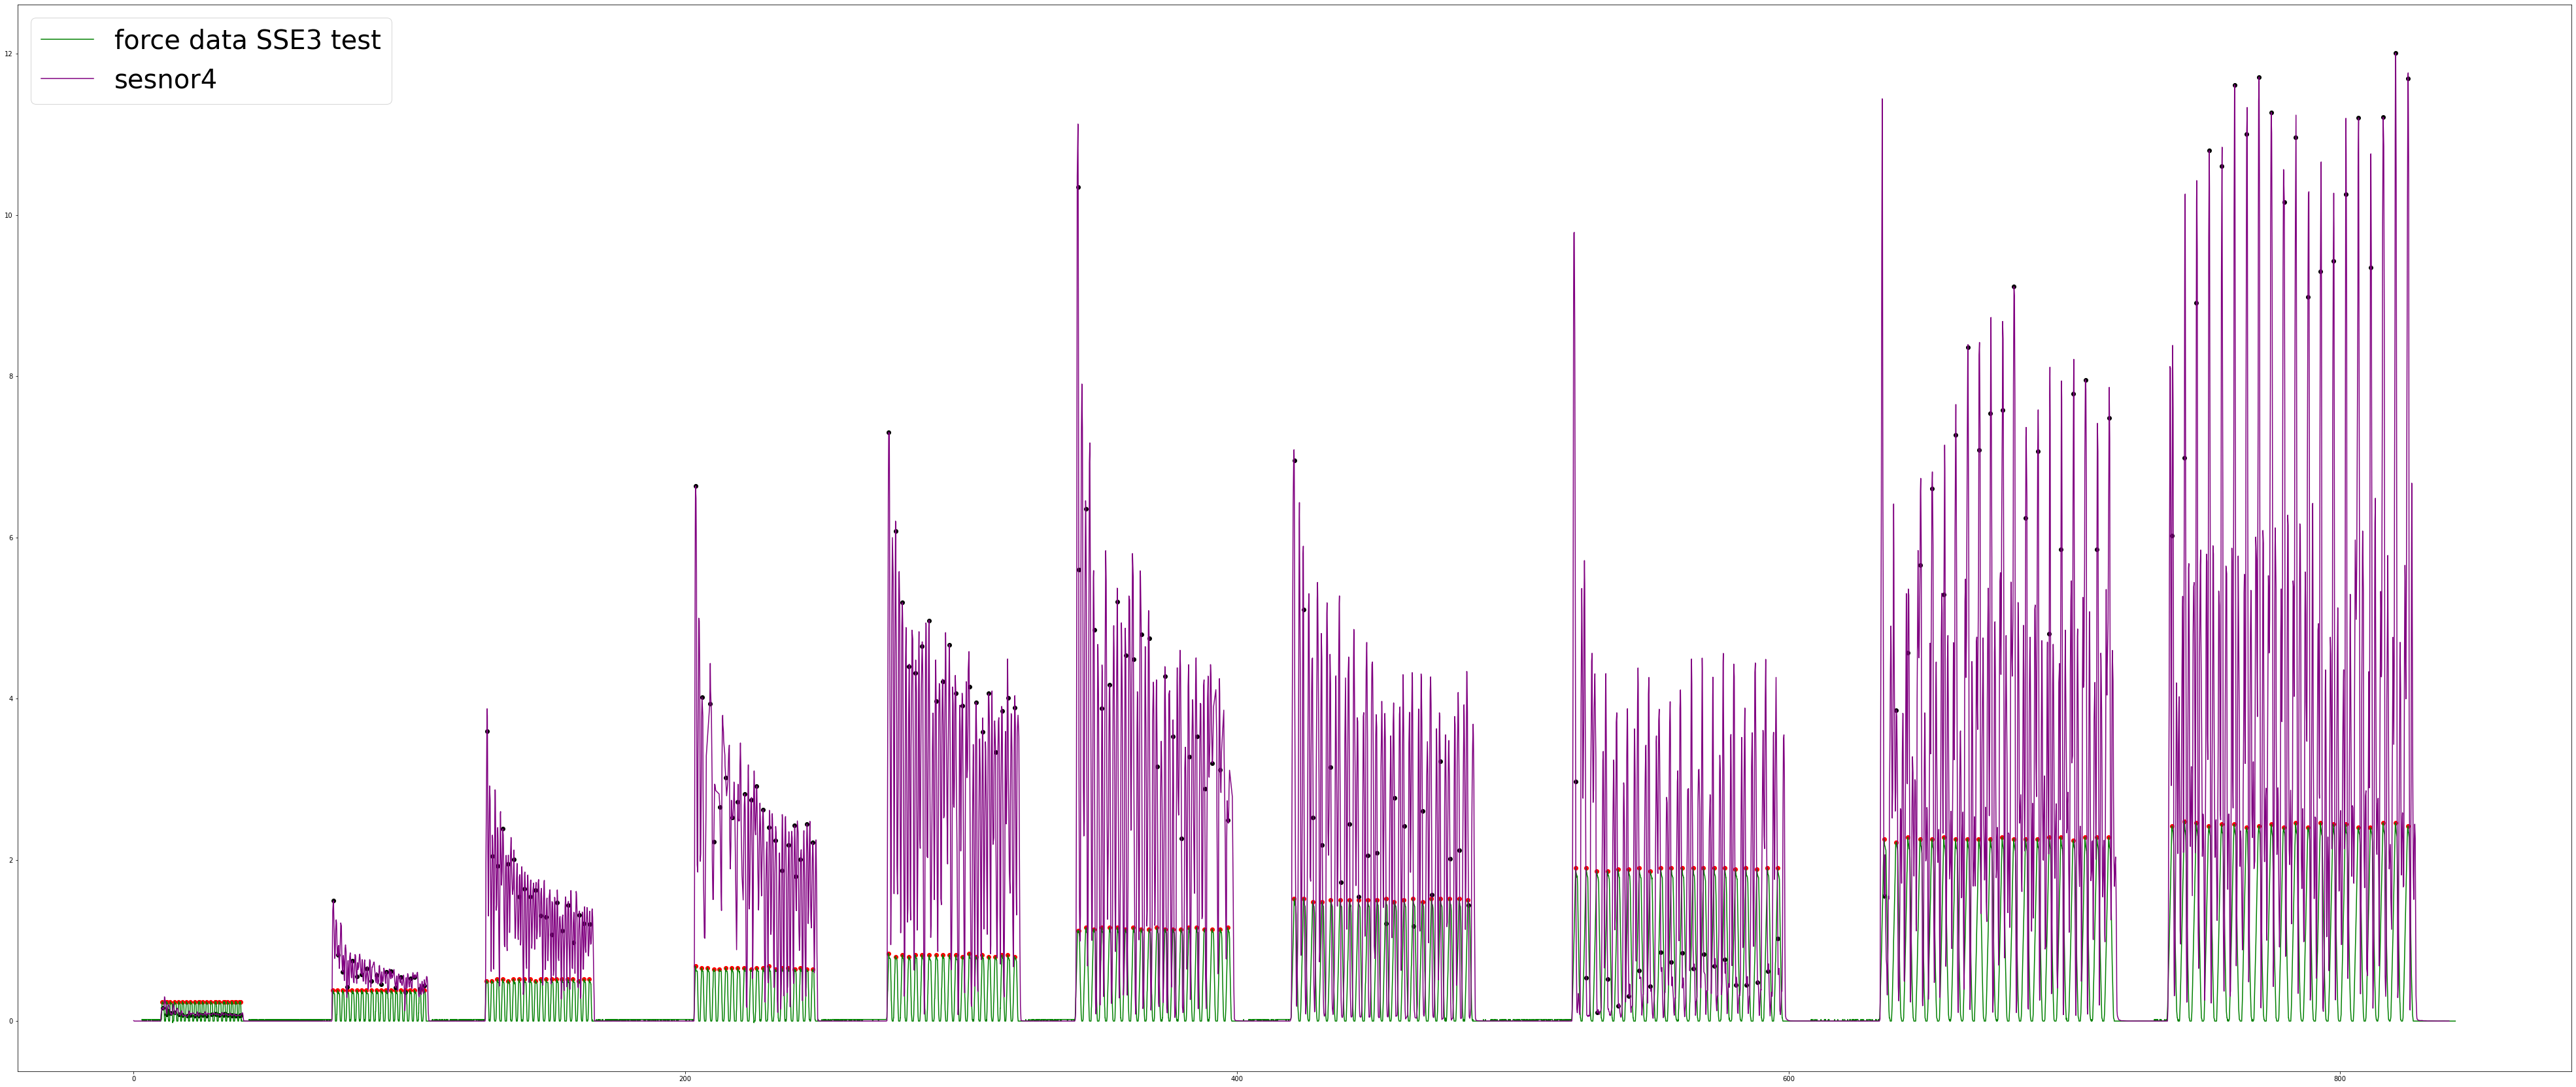

In [31]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSE3

plt.figure(figsize=(70, 30))

# plt.plot(SSE3["Unnamed: 0"],SSE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSE3["Unnamed: 0"],SSE3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSE3["Unnamed: 0"],SSE3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSE3["Unnamed: 0"],SSE3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSE3 = x_force_SSE3 + 3
scaled_SSE3 = SSE3["Unnamed: 0"]

plt.plot(scaled_x_force_SSE3,Load_SSE3,color = 'green', label = 'force data SSE3 test' )
plt.plot(scaled_SSE3,SSE3["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SSE3")

#finding the peaks
pidx_Load_SSE3, _ = find_peaks(Load_SSE3,prominence= 0.1 )
peaks_Load_SSE3 = Load_SSE3[pidx_Load_SSE3]
peaks_Ltime_SSE3 = scaled_x_force_SSE3[pidx_Load_SSE3]

plt.scatter(peaks_Ltime_SSE3,peaks_Load_SSE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSE3time = []
peaks_Ltime_SSE3.reset_index(drop = True, inplace = True)
peaks_Load_SSE3.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SSE3)):
    idx_SSE3time.append(bisect.bisect_left(SSE3["Unnamed: 0"], peaks_Ltime_SSE3[i]))

plt.scatter(SSE3["Unnamed: 0"][idx_SSE3time],SSE3["s4_d"][idx_SSE3time],color = 'black')

In [32]:
#Storing the data in csv files - SSE3
Load_SSE3peaks =[]
for i in range(len(peaks_Load_SSE3)):
    Load_SSE3peaks.append(peaks_Load_SSE3[i])
    
content_SSE3 = {'R1':SSE3["s1_d"][idx_SSE3time],
              'R2':SSE3["s2_d"][idx_SSE3time],
              'R3':SSE3["s3_d"][idx_SSE3time],
              'R4':SSE3["s4_d"][idx_SSE3time], 
              'Load': Load_SSE3peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SSE3 = pd.DataFrame(content_SSE3, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SSE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSE3.csv',index = False, header = True)

Sensor 4 is more profound for SEE4


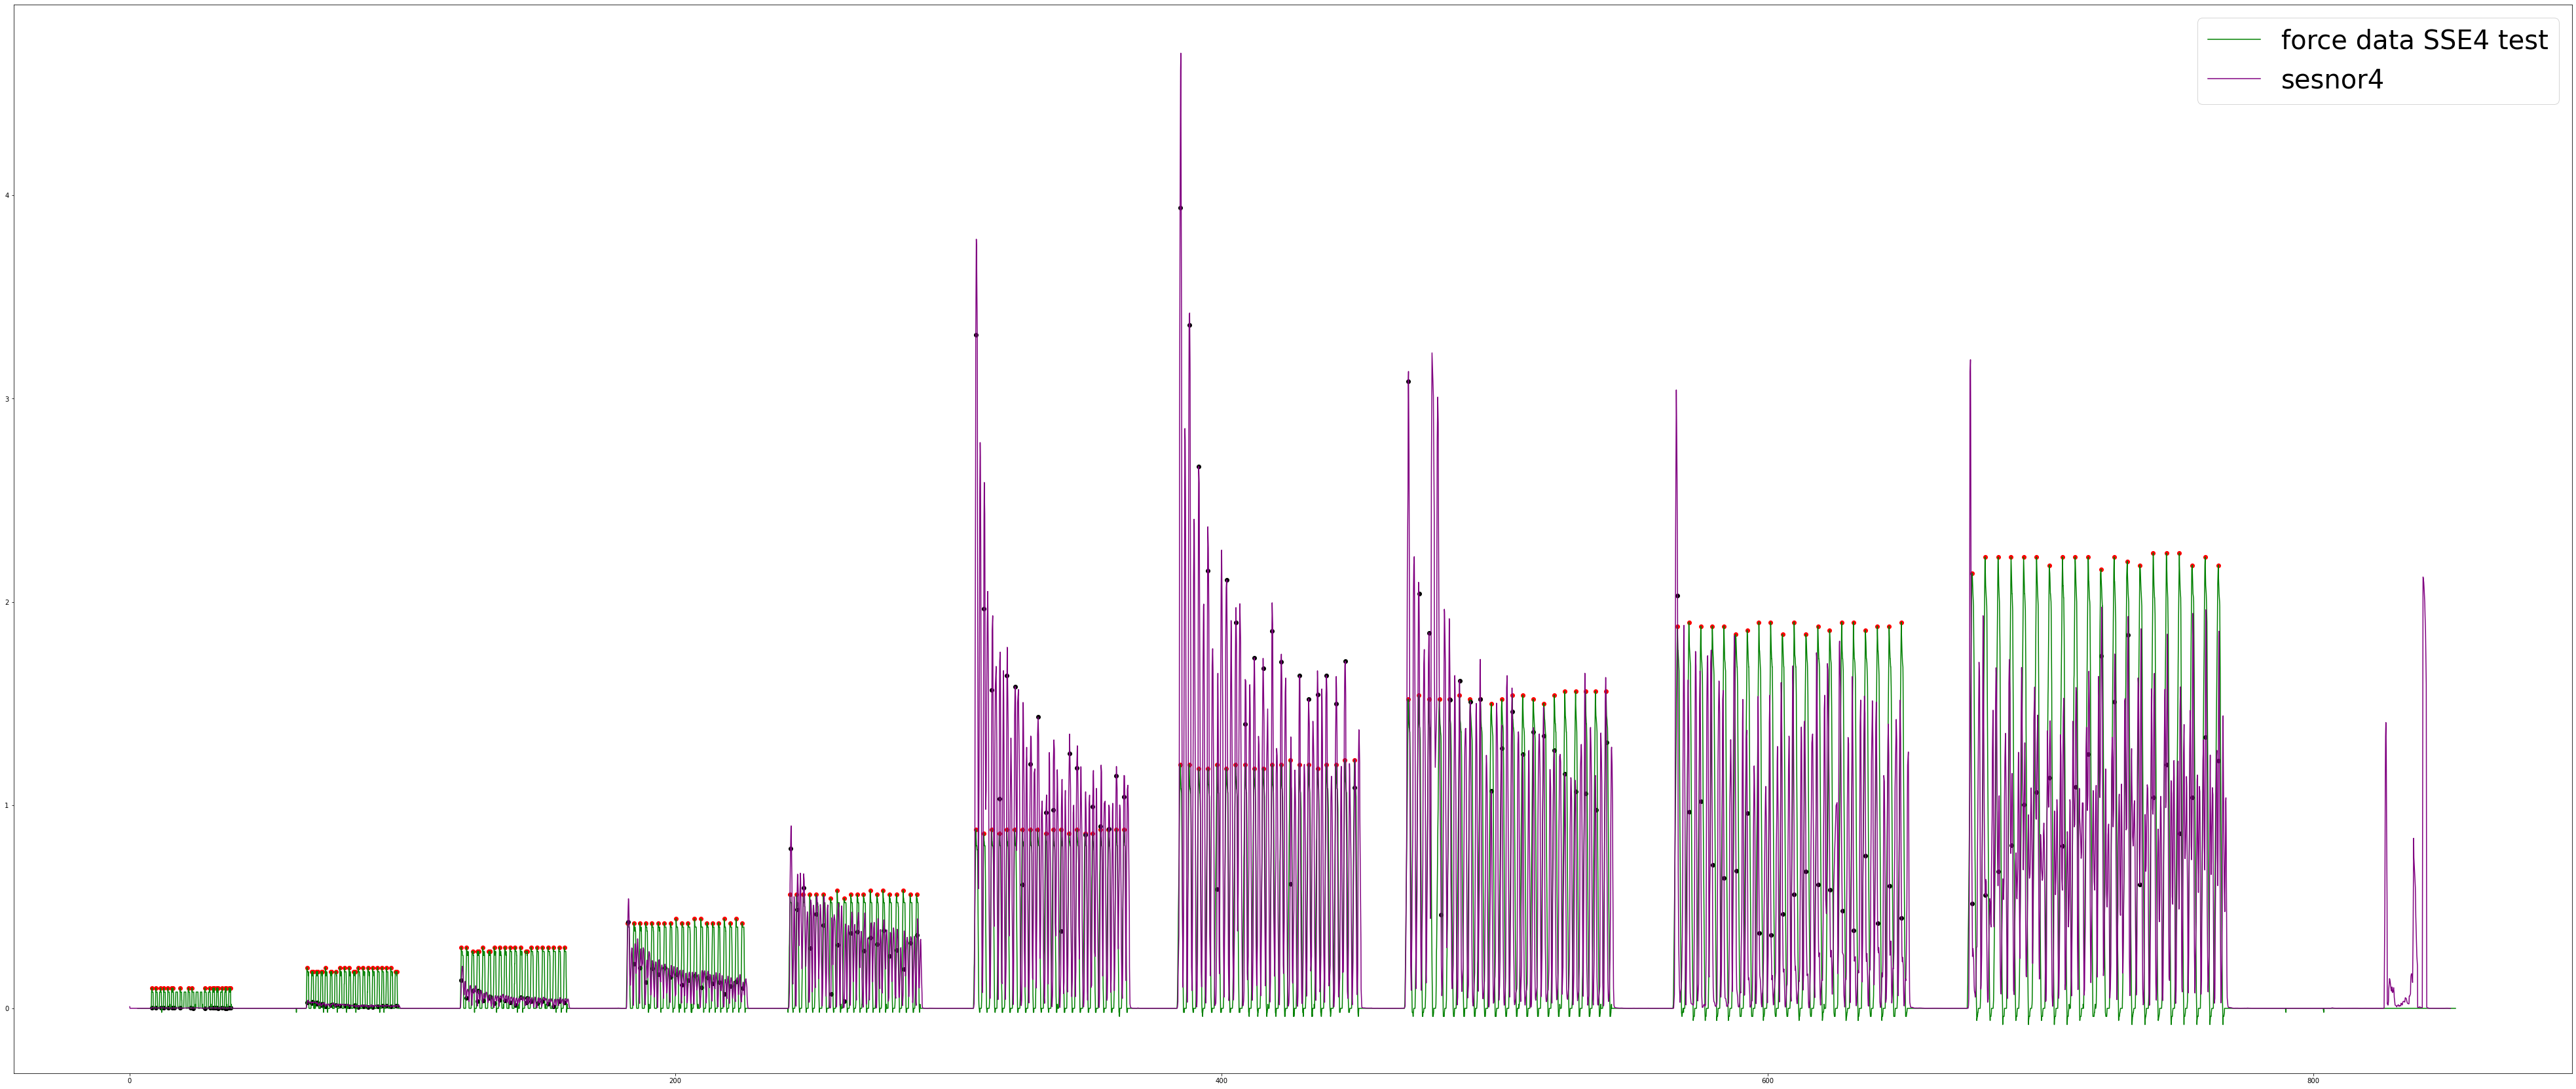

In [42]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSE4

plt.figure(figsize=(70, 30))

# plt.plot(SSE4["Unnamed: 0"],SSE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSE4["Unnamed: 0"],SSE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSE4["Unnamed: 0"],SSE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSE4["Unnamed: 0"],SSE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSE4 = x_force_SSE4 + 3
scaled_SSE4 = SSE4["Unnamed: 0"]

plt.plot(scaled_x_force_SSE4,Load_SSE4,color = 'green', label = 'force data SSE4 test' )
plt.plot(scaled_SSE4,SSE4["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SEE4")

#finding the peaks
pidx_Load_SSE4, _ = find_peaks(Load_SSE4,prominence= 0.1 )
peaks_Load_SSE4 = Load_SSE4[pidx_Load_SSE4]
peaks_Ltime_SSE4 = scaled_x_force_SSE4[pidx_Load_SSE4]

plt.scatter(peaks_Ltime_SSE4,peaks_Load_SSE4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSE4time = []
peaks_Ltime_SSE4.reset_index(drop = True, inplace = True)
peaks_Load_SSE4.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SSE4)):
    idx_SSE4time.append(bisect.bisect_left(SSE4["Unnamed: 0"], peaks_Ltime_SSE4[i]))

plt.scatter(SSE4["Unnamed: 0"][idx_SSE4time],SSE4["s4_d"][idx_SSE4time],color = 'black')

In [43]:
#Storing the data in csv files - SSE4
Load_SSE4peaks =[]
for i in range(len(peaks_Load_SSE4)):
    Load_SSE4peaks.append(peaks_Load_SSE4[i])
    
content_SSE4 = {'R1':SSE4["s1_d"][idx_SSE4time],
              'R2':SSE4["s2_d"][idx_SSE4time],
              'R3':SSE4["s3_d"][idx_SSE4time],
              'R4':SSE4["s4_d"][idx_SSE4time], 
              'Load': Load_SSE4peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SSE4 = pd.DataFrame(content_SSE4, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SSE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSE4.csv',index = False, header = True)

Sensor 2 is more profound for SSE5


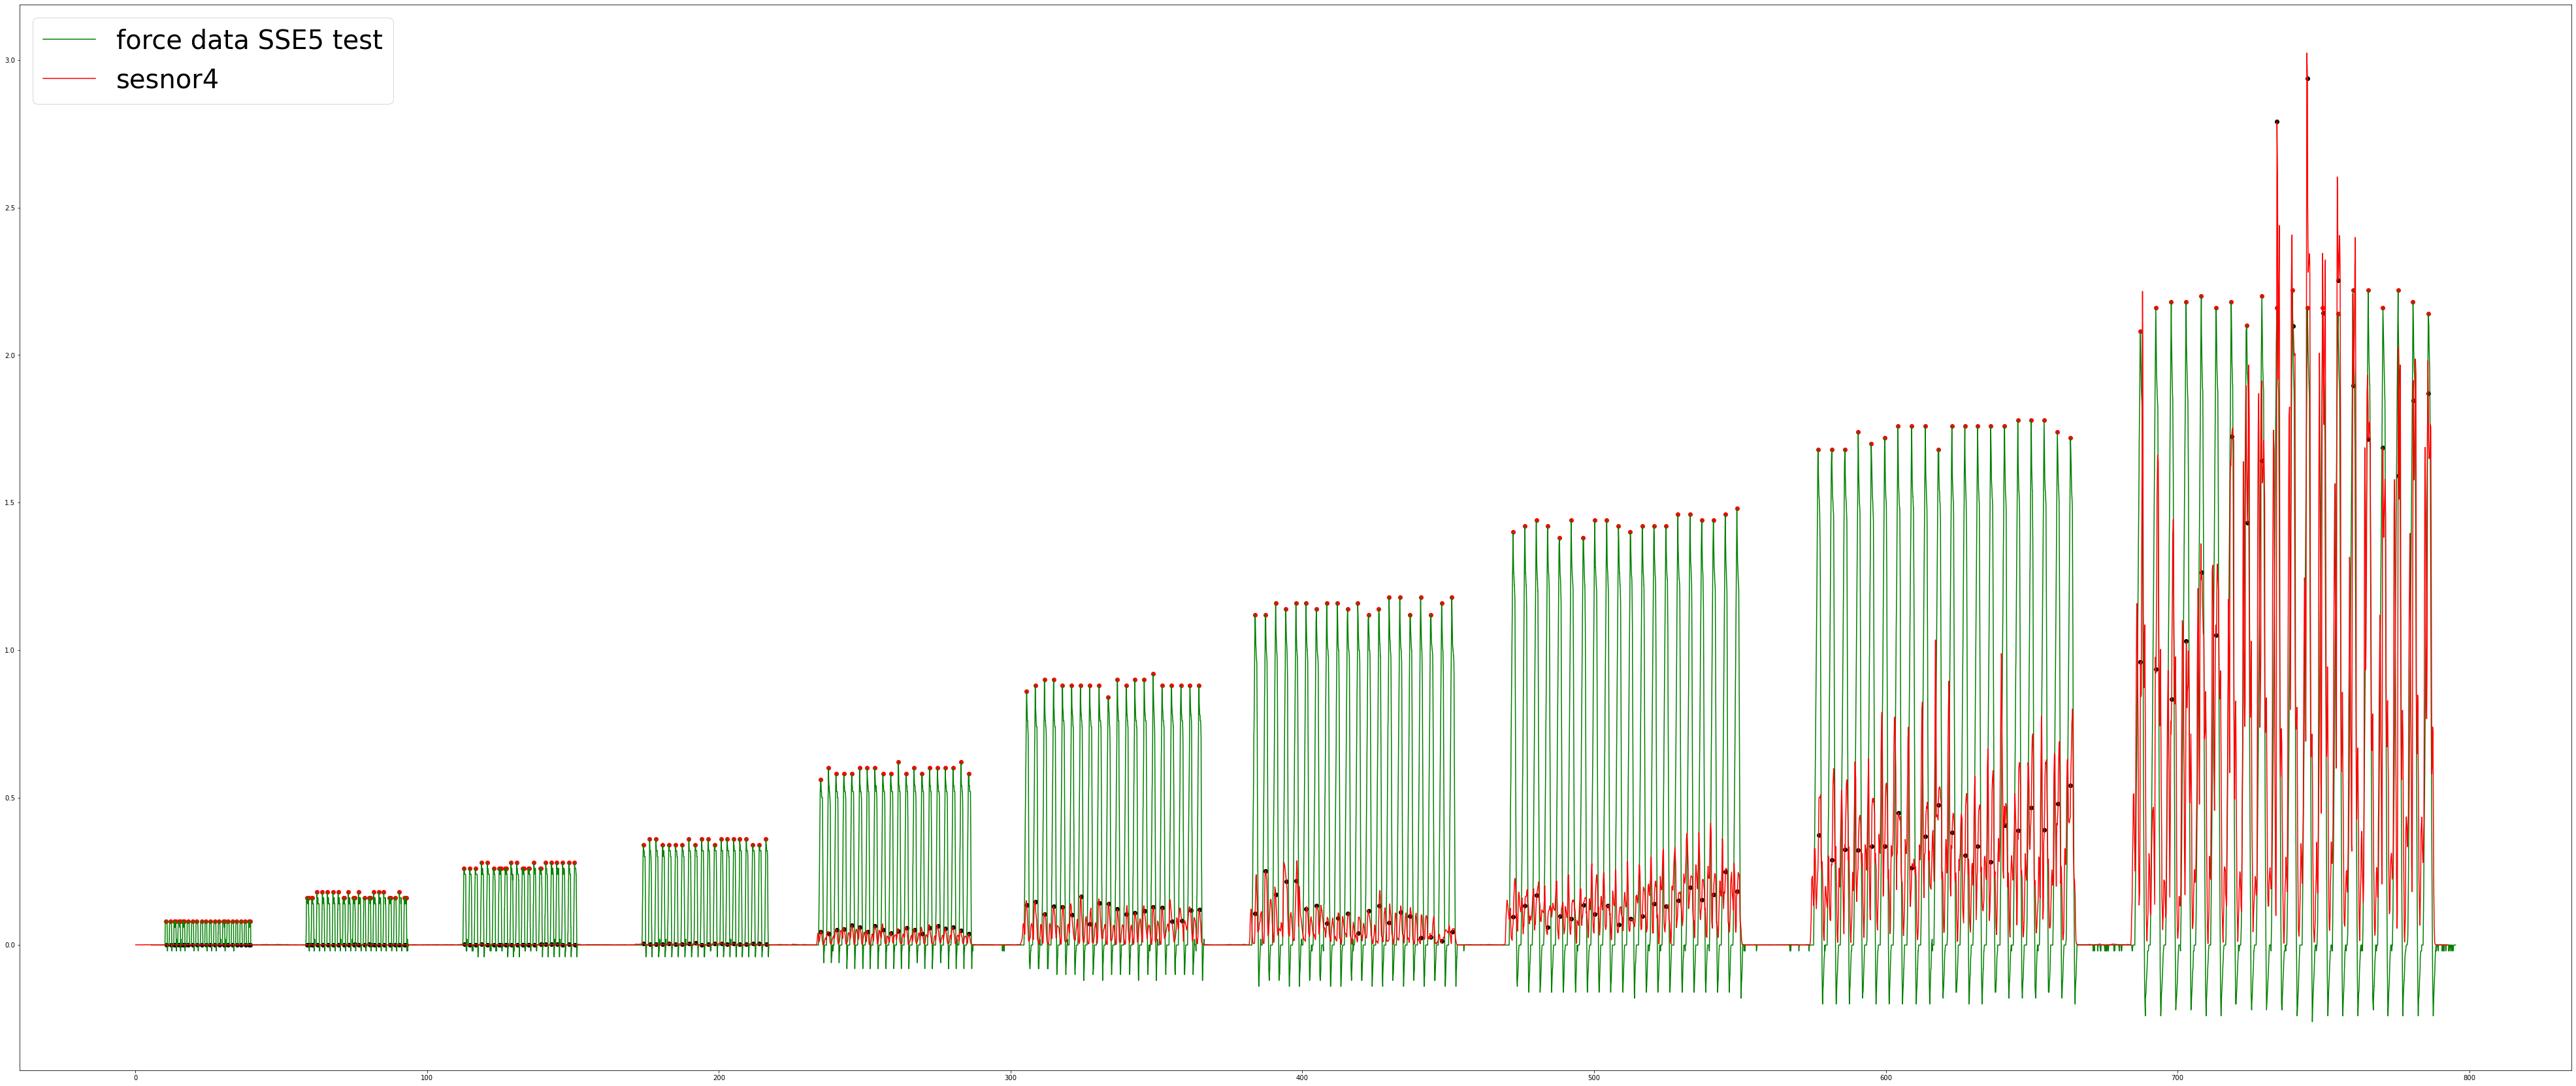

In [50]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SSE5

plt.figure(figsize=(70, 30))

# plt.plot(SSE5["Unnamed: 0"],SSE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SSE5["Unnamed: 0"],SSE5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SSE5["Unnamed: 0"],SSE5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SSE5["Unnamed: 0"],SSE5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SSE5 = x_force_SSE5 + 5.5
scaled_SSE5 = SSE5["Unnamed: 0"]

plt.plot(scaled_x_force_SSE5,Load_SSE5,color = 'green', label = 'force data SSE5 test' )
plt.plot(scaled_SSE5,SSE5["s2_d"], color = 'red', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 2 is more profound for SSE5")

#finding the peaks

pidx_Load_SSE5, _ = find_peaks(Load_SSE5,prominence= 0.08 )
peaks_Load_SSE5 = Load_SSE5[pidx_Load_SSE5]
peaks_Ltime_SSE5 = scaled_x_force_SSE5[pidx_Load_SSE5]

plt.scatter(peaks_Ltime_SSE5,peaks_Load_SSE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SSE5time = []
peaks_Ltime_SSE5.reset_index(drop = True, inplace = True)
peaks_Load_SSE5.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SSE5)):
    idx_SSE5time.append(bisect.bisect_left(SSE5["Unnamed: 0"], peaks_Ltime_SSE5[i]))

plt.scatter(SSE5["Unnamed: 0"][idx_SSE5time],SSE5["s2_d"][idx_SSE5time],color = 'black')

In [51]:
#Storing the data in csv files - SSE5
Load_SSE5peaks =[]
for i in range(len(peaks_Load_SSE5)):
    Load_SSE5peaks.append(peaks_Load_SSE5[i])
    
content_SSE5 = {'R1':SSE5["s1_d"][idx_SSE5time],
              'R2':SSE5["s2_d"][idx_SSE5time],
              'R3':SSE5["s3_d"][idx_SSE5time],
              'R4':SSE5["s4_d"][idx_SSE5time], 
              'Load': Load_SSE5peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SSE5 = pd.DataFrame(content_SSE5, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SSE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SSE5.csv',index = False, header = True)